In [68]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [156]:
data = pd.read_csv("../Data/avalanche_colorado.csv")
data['Date'] = data['Date'].str.split(' GMT').str[0]
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.strftime('%b %d')
data = data.loc[:, ["Date", "Longitude", "latitude"]]
data

,Date,Longitude,latitude
0,Feb 28,-106.940286,39.120652
1,Feb 28,-107.717674,37.924026
2,Feb 28,-106.795630,38.958436
3,Feb 28,-107.106025,38.830394
4,Feb 28,-120.669520,48.720966
...,...,...,...
705,Feb 01,-105.892513,40.520816
706,Feb 01,-107.717425,37.919413
707,Feb 01,-107.077487,38.936658
708,Feb 01,-107.717425,37.919413


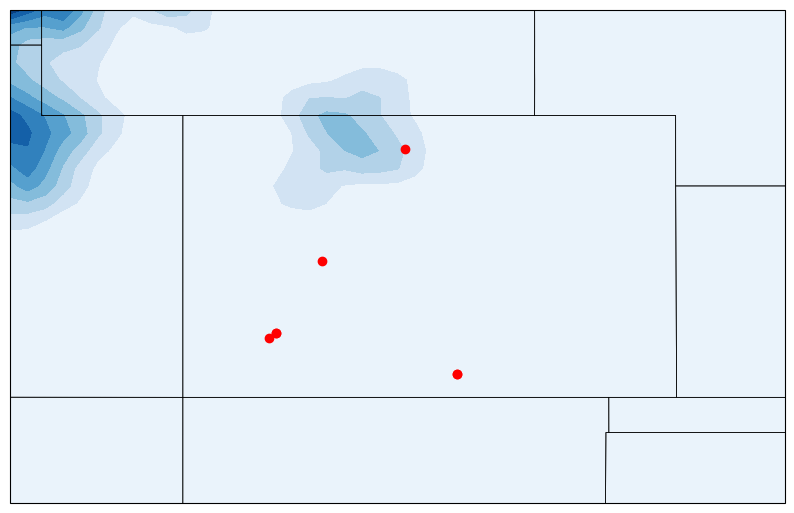

In [ ]:
precip_data = xr.open_dataset("../Data/Colorado_Precip.nc")
data_to_plot = precip_data['tp'].sel(valid_time = "2025-02-01").groupby('longitude').sum(dim = "valid_time")
feb_01 = data[data["Date"] == "Feb 01"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
plt.contourf(data_to_plot['longitude'], data_to_plot['latitude'], data_to_plot, transform=ccrs.PlateCarree(), cmap = 'Blues')
ax.set_extent([-111.5, -100.5, 35.5, 42.5], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')
ax.scatter(feb_01["Longitude"], feb_01["latitude"], color = 'red')

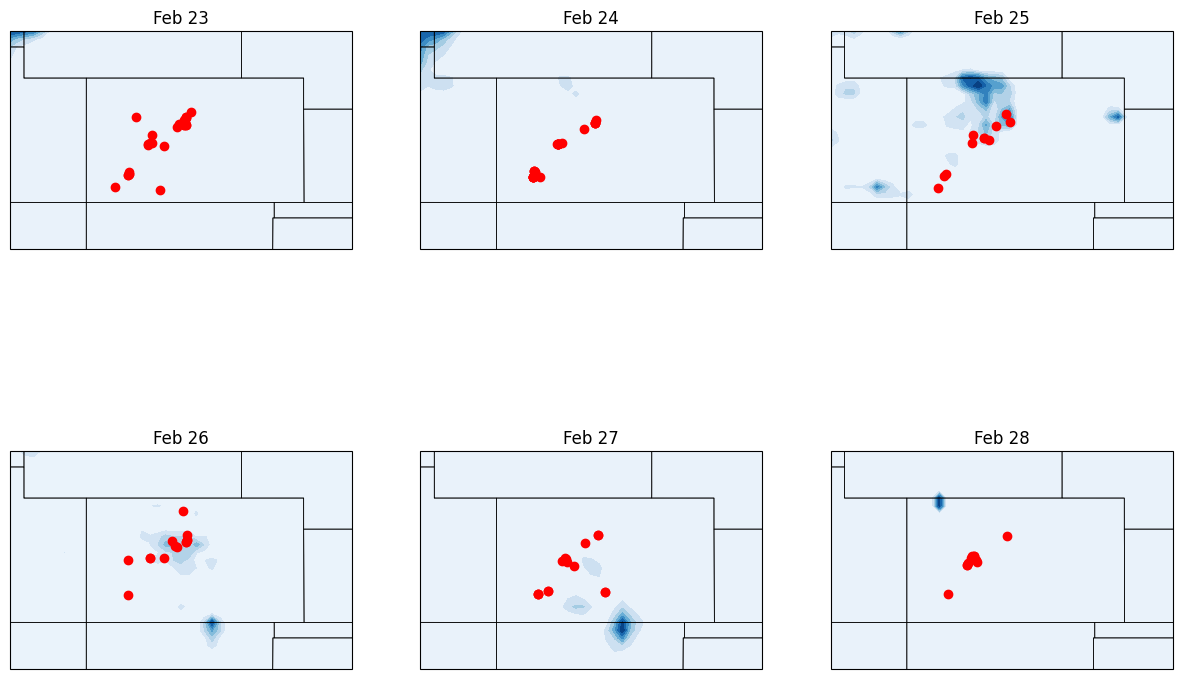

In [166]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axis_titles = [ax1, ax2, ax3, ax4, ax5, ax6]
valid_times = ["2025-02-23", "2025-02-24", "2025-02-25", "2025-02-26", "2025-02-27", "2025-02-28"]
dates = ["Feb 23", "Feb 24", "Feb 25", "Feb 26", "Feb 27", "Feb 28"]

for ax, time, date in zip(axis_titles, valid_times, dates):
    data_to_plot = precip_data['tp'].sel(valid_time = time).groupby('longitude').sum(dim = "valid_time")
    filtered_data = data[data["Date"] == date]
    #fig = plt.figure(figsize=(10, 8))
    #ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    countourf = ax.contourf(precip_data['longitude'], precip_data['latitude'], data_to_plot, transform=ccrs.PlateCarree(), cmap = 'Blues')
    ax.set_extent([-111.5, -100.5, 35.5, 42.5], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')
    ax.scatter(filtered_data["Longitude"], filtered_data["latitude"], color = 'red')
    ax.set_title(date)


In [145]:
precip_data['tp'].sel(valid_time = "2025-02-23").groupby('longitude').sum(dim = "valid_time")

<xarray.DataArray 'tp' (latitude: 29, longitude: 45)> Size: 5kB
array([[9.51766968e-04, 8.64028931e-04, 7.93457031e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.23567200e-04, 3.77655029e-04, 2.78949738e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.08036804e-04, 1.13487244e-04, 7.20024109e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 232B 42.5 42.25 42.0 41.75 ... 36.0 35.75 35.5
  * longitude  (longitude) float64 360B -111.5 -111.2 -111.0 ... -100.8 -100.5
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1305
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

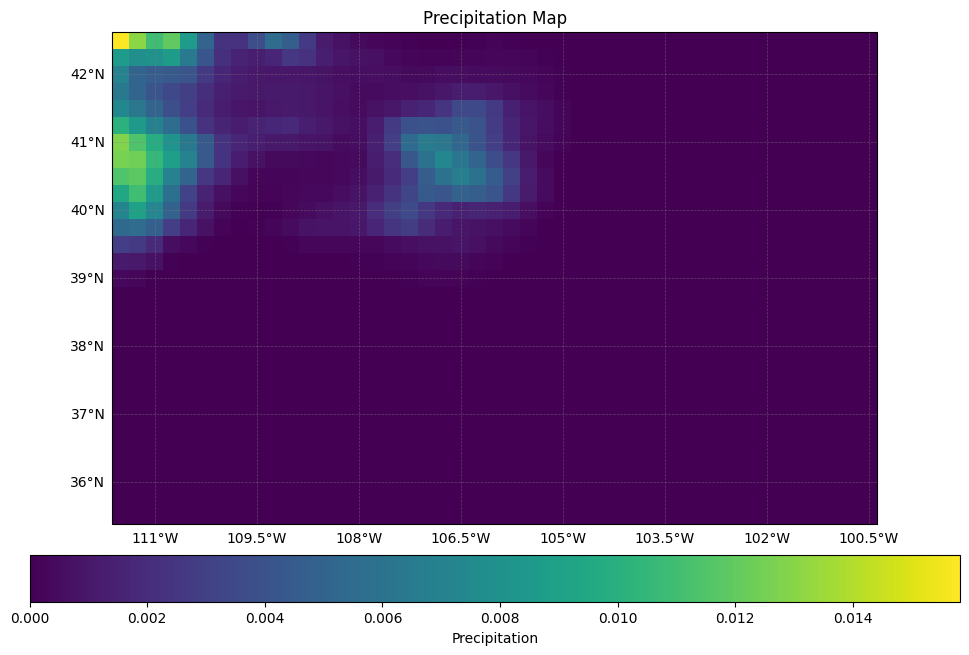

In [108]:
data_precip = xr.open_dataset("../Data/Colorado_Precip.nc")
data_precip_var = precip_data['tp']
longitude_var = precip_data['longitude']
latitude_var = precip_data['latitude']

data_to_plot = precip_data['tp'].sel(valid_time = "2025-02-01").groupby('longitude').sum(dim = "valid_time")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
lon_2d, lat_2d = np.meshgrid(longitude_var, latitude_var)
im = ax.pcolormesh(lon_2d, lat_2d, data_to_plot, transform=ccrs.PlateCarree(), cmap='viridis')
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label("Precipitation")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax.set_title('Precipitation Map')
plt.show()

/Users/joey/Library/Python/3.9/lib/python/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


/Users/joey/Library/Python/3.9/lib/python/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


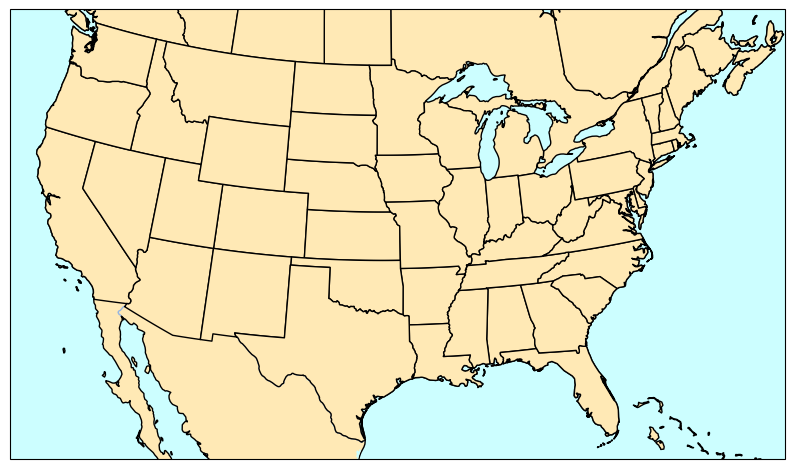

In [51]:
conus_proj = ccrs.LambertConformal(central_longitude=-96,central_latitude=39.0)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1,projection=conus_proj)
ax.set_extent([-120,-70,22,50])
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN, facecolor='#CCFEFF')
ax.add_feature(cfeature.LAKES, facecolor='#CCFEFF')
ax.add_feature(cfeature.RIVERS, facecolor='#CCFEFF')
ax.add_feature(cfeature.LAND, facecolor='#FFE9B5')
state_borders = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='#FFE9B5')
ax.add_feature(state_borders, edgecolor='black')